<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/Vision_AIHUB/pretrainedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import modules


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

import os
import zipfile

### Label

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
labels = []
with open('/content/drive/MyDrive/DeepLearning/대구AI허브/ImageNetLabels.txt') as f:
    labels = f.readlines()

### Load images
  - Unzip

In [5]:
zip = zipfile.ZipFile('/content/drive/MyDrive/DeepLearning/대구AI허브/testImage.zip', 'r')
zip.extractall('testImage')
zip.close()
filenames = os.listdir('testImage')

### VGG-16

In [8]:
from keras.applications import vgg16

model = vgg16.VGG16(weights='imagenet')
model.summary()

553476096/553467096 [==============================] - 14s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [11]:
image = keras.preprocessing.image.load_img('./testImage/01.jpg', target_size=(224, 224))
imageArr = np.array(image)
imageArr = imageArr.reshape(-1, 224, 224, 3)
imageArr = vgg16.preprocess_input(imageArr)
imageArr.shape

(1, 224, 224, 3)

In [12]:
pred = model.predict(imageArr)
vgg16.decode_predictions(pred, top=3)

49152/35363 [=========================================] - 0s 0us/step


[[('n04179913', 'sewing_machine', 0.47909066),
  ('n03297495', 'espresso_maker', 0.28998825),
  ('n04336792', 'stretcher', 0.0649149)]]

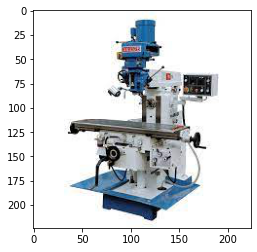

In [13]:
plt.imshow(image)
plt.show()

# 5. Resnet

In [16]:
from tensorflow.keras.applications import resnet50 

Resnet_model = resnet50.ResNet50(weights='imagenet')
Resnet_model.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [17]:
image = keras.preprocessing.image.load_img('./testImage/02.jpg', target_size=(224, 224))
imageArr = np.array(image)
imageArr = imageArr.reshape(-1, 224, 224, 3)
imageArr = resnet50.preprocess_input(imageArr)
imageArr.shape

(1, 224, 224, 3)

[[('n02134084', 'ice_bear', 0.9997652), ('n02132136', 'brown_bear', 0.00013906573), ('n02114548', 'white_wolf', 6.0272076e-05)]]


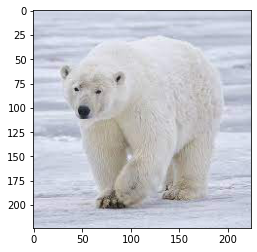

In [18]:
pred = Resnet_model.predict(imageArr)
print(resnet50.decode_predictions(pred, top=3))
plt.imshow(image)
plt.show()

[[('n02132136', 'brown_bear', 0.9964972), ('n02133161', 'American_black_bear', 0.0026783117), ('n01883070', 'wombat', 0.00030143338)]]


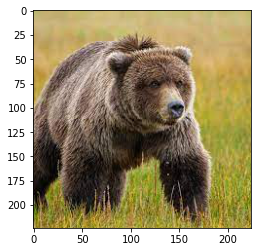

In [20]:
image = keras.preprocessing.image.load_img('./testImage/03.jpg', target_size=(224, 224))
imageArr = np.array(image)
imageArr = imageArr.reshape(-1, 224, 224, 3)
imageArr = resnet50.preprocess_input(imageArr)
pred = Resnet_model.predict(imageArr)
print(resnet50.decode_predictions(pred, top=3))
plt.imshow(image)
plt.show()